In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

648

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
   
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | salalah
Processing Record 2 of Set 1 | palmer
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | palu
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | mana
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | meulaboh
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | luderitz
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | byron bay
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | awjilah
Processing Record 18 of Set 1 | nikel
Processing Record 19 of Set 1 | norman wells
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set 1 | hilo
Processing Record 23 of Set 1 | izumo
Processing Record 24

Processing Record 38 of Set 4 | goderich
Processing Record 39 of Set 4 | nanzhang
Processing Record 40 of Set 4 | grand bank
Processing Record 41 of Set 4 | fairbanks
Processing Record 42 of Set 4 | richards bay
Processing Record 43 of Set 4 | acireale
Processing Record 44 of Set 4 | mrirt
City not found. Skipping...
Processing Record 45 of Set 4 | benguela
Processing Record 46 of Set 4 | cowansville
Processing Record 47 of Set 4 | tatawin
Processing Record 48 of Set 4 | sur
Processing Record 49 of Set 4 | kaduna
Processing Record 50 of Set 4 | tigil
Processing Record 1 of Set 5 | pangnirtung
Processing Record 2 of Set 5 | sioux lookout
Processing Record 3 of Set 5 | tagusao
Processing Record 4 of Set 5 | port macquarie
Processing Record 5 of Set 5 | blackwater
Processing Record 6 of Set 5 | charters towers
Processing Record 7 of Set 5 | ballina
Processing Record 8 of Set 5 | suntar
Processing Record 9 of Set 5 | port elizabeth
Processing Record 10 of Set 5 | inuvik
Processing Record 1

Processing Record 26 of Set 8 | nelson bay
Processing Record 27 of Set 8 | segezha
Processing Record 28 of Set 8 | beringovskiy
Processing Record 29 of Set 8 | lesnyye polyany
Processing Record 30 of Set 8 | kismayo
Processing Record 31 of Set 8 | caucaia
Processing Record 32 of Set 8 | malinovskiy
Processing Record 33 of Set 8 | san isidro
Processing Record 34 of Set 8 | murgab
Processing Record 35 of Set 8 | ariquemes
Processing Record 36 of Set 8 | cochrane
Processing Record 37 of Set 8 | la tuque
Processing Record 38 of Set 8 | vostok
Processing Record 39 of Set 8 | ulaangom
Processing Record 40 of Set 8 | zapolyarnyy
Processing Record 41 of Set 8 | hambantota
Processing Record 42 of Set 8 | coos bay
Processing Record 43 of Set 8 | cockburn town
Processing Record 44 of Set 8 | amuntai
Processing Record 45 of Set 8 | caborca
Processing Record 46 of Set 8 | orsha
Processing Record 47 of Set 8 | kununurra
Processing Record 48 of Set 8 | nguiu
City not found. Skipping...
Processing Rec

Processing Record 14 of Set 12 | sao filipe
Processing Record 15 of Set 12 | kyaikto
Processing Record 16 of Set 12 | kaitong
Processing Record 17 of Set 12 | vvedenskoye
Processing Record 18 of Set 12 | taunsa
Processing Record 19 of Set 12 | kahului
Processing Record 20 of Set 12 | naze
Processing Record 21 of Set 12 | burnie
Processing Record 22 of Set 12 | rio grande
Processing Record 23 of Set 12 | waipawa
Processing Record 24 of Set 12 | acari
Processing Record 25 of Set 12 | mahibadhoo
Processing Record 26 of Set 12 | maamba
Processing Record 27 of Set 12 | agadez
Processing Record 28 of Set 12 | bilibino
Processing Record 29 of Set 12 | clovis
Processing Record 30 of Set 12 | kielce
Processing Record 31 of Set 12 | grindavik
Processing Record 32 of Set 12 | makakilo city
Processing Record 33 of Set 12 | manta
Processing Record 34 of Set 12 | kushiro
Processing Record 35 of Set 12 | sidi ali
Processing Record 36 of Set 12 | vetapalem
Processing Record 37 of Set 12 | orcopampa
Pr

In [11]:
count = len(city_data)
print(count)

597


In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Salalah,17.0151,54.0924,75.29,38,0,14.97,OM,2022-01-29 00:08:30
1,Palmer,42.1584,-72.3287,30.07,70,75,3.44,US,2022-01-29 00:08:24
2,Chuy,-33.6971,-53.4616,64.67,72,38,6.67,UY,2022-01-29 00:04:46
3,Palu,-0.8917,119.8707,78.80,85,100,1.81,ID,2022-01-29 00:08:31
4,Upernavik,72.7868,-56.1549,4.06,68,100,6.87,GL,2022-01-29 00:08:31
5,Ushuaia,-54.8000,-68.3000,56.86,67,75,6.91,AR,2022-01-29 00:05:20
6,Mana,5.6592,-53.7767,76.30,80,30,8.23,GF,2022-01-29 00:06:13
7,Bluff,-46.6000,168.3333,60.96,64,93,6.31,NZ,2022-01-29 00:08:32
8,Meulaboh,4.1363,96.1285,77.70,88,63,2.51,ID,2022-01-29 00:08:33
9,Cape Town,-33.9258,18.4232,66.34,68,0,7.00,ZA,2022-01-29 00:08:33


In [13]:
reorg_city_data = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
reorg_city_data_df = city_data_df[reorg_city_data]
reorg_city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Salalah,OM,2022-01-29 00:08:30,17.0151,54.0924,75.29,38,0,14.97
1,Palmer,US,2022-01-29 00:08:24,42.1584,-72.3287,30.07,70,75,3.44
2,Chuy,UY,2022-01-29 00:04:46,-33.6971,-53.4616,64.67,72,38,6.67
3,Palu,ID,2022-01-29 00:08:31,-0.8917,119.8707,78.80,85,100,1.81
4,Upernavik,GL,2022-01-29 00:08:31,72.7868,-56.1549,4.06,68,100,6.87
...,...,...,...,...,...,...,...,...,...
592,Taoudenni,ML,2022-01-29 00:25:50,22.6783,-3.9836,71.85,11,97,13.51
593,Gavle,SE,2022-01-29 00:25:50,60.6745,17.1417,31.50,79,91,5.99
594,Half Moon Bay,US,2022-01-29 00:25:51,37.4636,-122.4286,68.58,45,0,3.44
595,Moose Factory,CA,2022-01-29 00:25:51,51.2585,-80.6094,-2.22,65,100,3.44


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

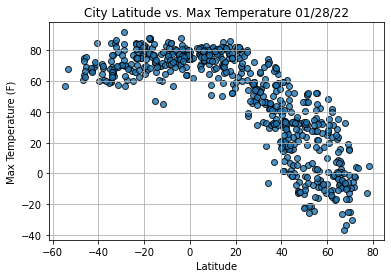

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

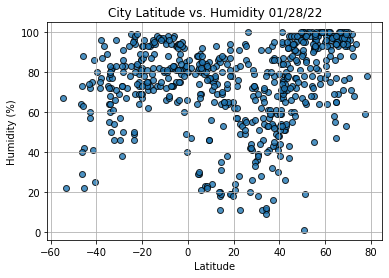

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

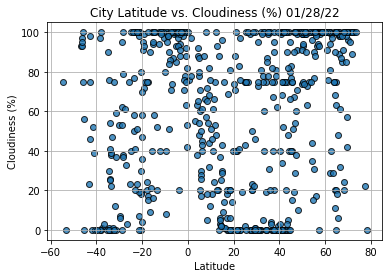

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

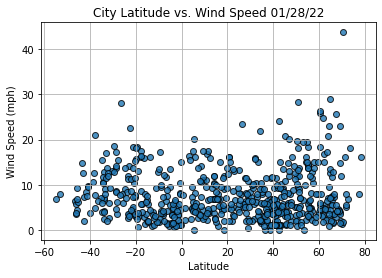

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                   Butaritari
Lat                        3.0707
Lng                      172.7902
Max Temp                    81.82
Humidity                       79
Cloudiness                     55
Wind Speed                  16.42
Country                        KI
Date          2022-01-29 00:08:36
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
592     True
593     True
594     True
595     True
596     True
Name: Lat, Length: 597, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Salalah,17.0151,54.0924,75.29,38,0,14.97,OM,2022-01-29 00:08:30
1,Palmer,42.1584,-72.3287,30.07,70,75,3.44,US,2022-01-29 00:08:24
4,Upernavik,72.7868,-56.1549,4.06,68,100,6.87,GL,2022-01-29 00:08:31
6,Mana,5.6592,-53.7767,76.30,80,30,8.23,GF,2022-01-29 00:06:13
8,Meulaboh,4.1363,96.1285,77.70,88,63,2.51,ID,2022-01-29 00:08:33


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

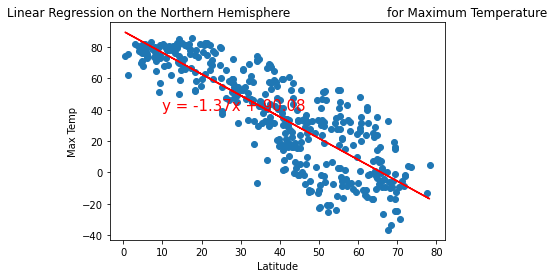

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

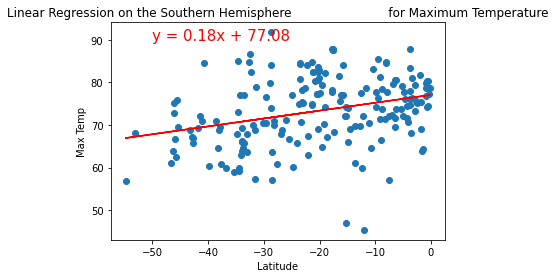

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

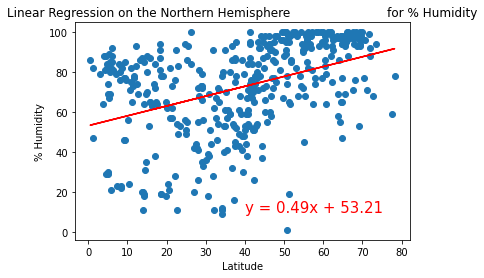

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

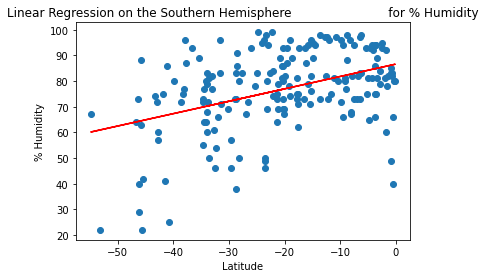

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

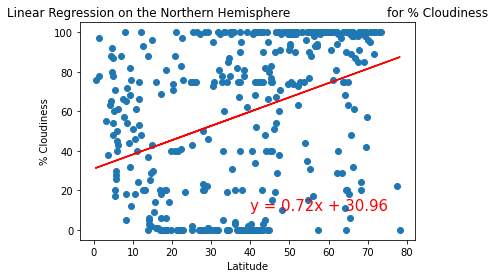

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

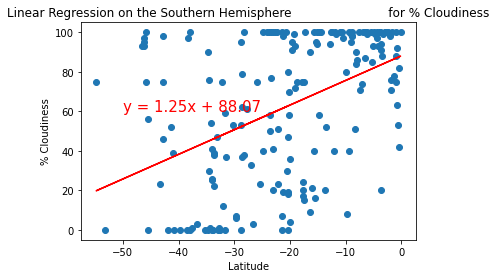

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

SyntaxError: EOL while scanning string literal (Temp/ipykernel_28128/717623055.py, line 6)

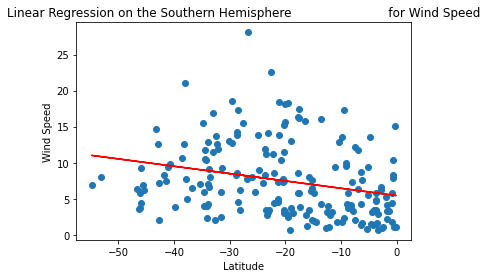

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))